## This data analysis project with multivariate linear regression model from sklearn

In [35]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [36]:
# importing dataset and deleting reduntant column
data = pd.read_csv('Advertising.csv')
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


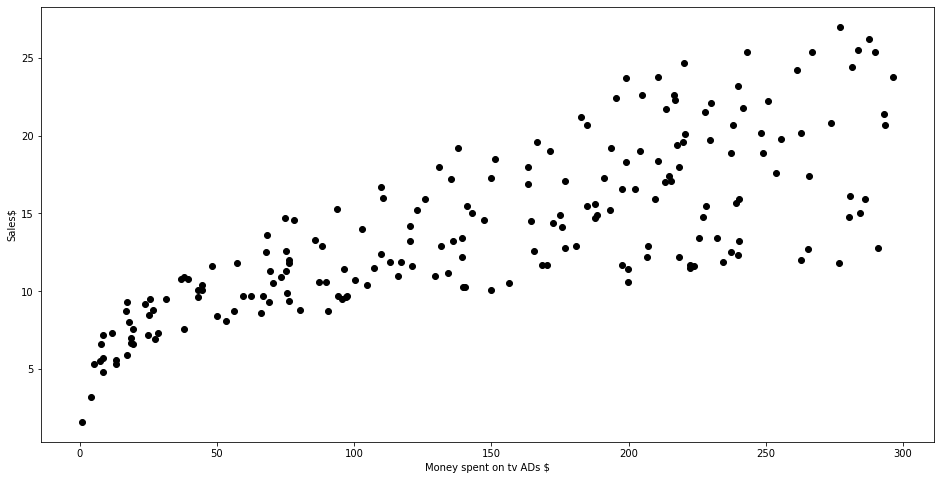

In [37]:
# Visual explaratory data analysis with single variable
plt.figure(figsize=(16,8))
plt.scatter(data['TV'],data['sales'],c='black')
plt.xlabel('Money spent on tv ADs $')
plt.ylabel('Sales$')
plt.show()

In [38]:
#Preprocessing data for sklearn model
X = data.drop(['sales', 'Unnamed: 0'], axis=1)
y = data['sales'].values.reshape(-1,1)
#Spliting data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
# instantiation of model
model = LinearRegression()
# fitting data into model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#Testing model with testing dataset
y_pred = model.predict(X_test)

In [41]:
#Comparing results with testing data
compar = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':y_pred.flatten()})
compar.head()

,Actual,Predicted
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373


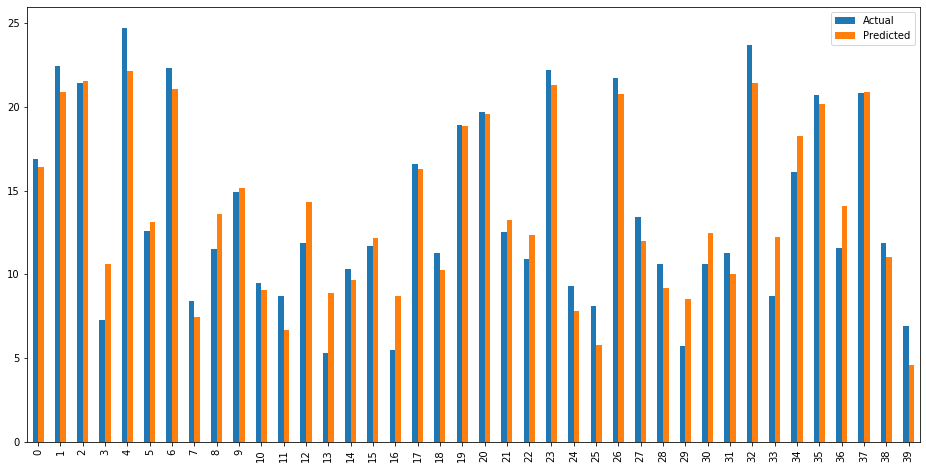

In [42]:
# Plotting difference
compar.plot(kind='bar',figsize=(16,8))
plt.show()

In [43]:
# Getting parameters of regression
theta1 = model.coef_
theta0 = model.intercept_
# Sales = Theta0 + Theta1 * TVI 
print(theta1,theta0)

[[0.04472952 0.18919505 0.00276111]] [2.97906734]


In [44]:
#Assesing model
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.58e-96
Time:                        11:03:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

# Conclusion :

Model demonstrates that there is a strong relationship between ad spending and sales.
Also because we only have three predictors, we can consider their p-value to determine if they are relevant to the model or not. Of course, you notice that the third coefficient (the one for newspaper) has a large p-value. Therefore, ad spending on newspaper is not statistically significant. Removing that predictor would slightly reduce the R² value, but we might make better predictions.